# 3-6. 프로젝트: 고양이 수염 스티커 만들기

### [루브릭]

아래의 기준을 바탕으로 프로젝트를 평가합니다.

평가문항 및 상세기준
1. 자기만의 카메라앱 기능 구현을 완수하였다. 
    - 원본에 스티커 사진이 정상적으로 합성되었다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다. 
    - 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다. 
    - 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.
    
### [학습 과정]
1. 스티커 구하기 or 만들기
2. 얼굴 검출 & 랜드마크 검출 하기
3. 스티커 적용 위치 확인하기
4. 스티커 적용하기
5. 문제점 찾아보기

#### 스티커 구하기

구글에 cat whiskers png 라고 검색한 뒤 

In [336]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
print("🌫🛸") # 이미지 잘 읽어오는지 확인

🌫🛸


다양한 원본 이미지 가져오는 함수 만들어주기

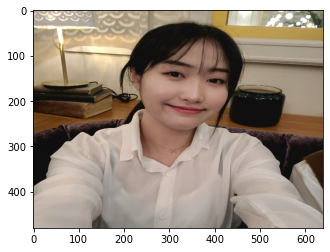

In [319]:
my_img_path = os.getenv('HOME')+'/project/AIFFEL/E03_CameraSticker/images/IMG_20201024_202505_572.jpg'
img_bgr = cv2.imread(my_img_path)  #OpenCV로 이미지 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    #640x480 크기로 resize
img_show = img_bgr.copy()     #출력용 이미지 별도 보관
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### face detection

In [320]:
# dlib을 활용해 hog detector를 선언
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [321]:
#detector를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(241, 68) (464, 291)]]


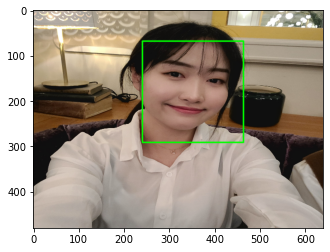

In [322]:
print(dlib_rects) # 찾은 얼굴영역 좌표

# face box 그리기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()     #
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0, 255, 0), 2, lineType = cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [323]:
temp = list((2,3,4,5))

In [324]:
temp

[2, 3, 4, 5]

In [325]:
# 저장한 landmark 모델 불러오기

model_path = os.getenv('HOME')+'/project/AIFFEL/E03_CameraSticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [326]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


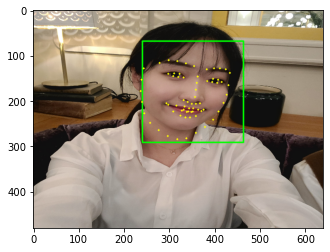

In [327]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)  # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [328]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])      # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]     #- dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(357, 191)
(x,y) : (357,191)
(w,h) : (224,224)


In [329]:
sticker_path = os.getenv('HOME') + '/project/AIFFEL/E03_CameraSticker/images/catWhiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w+50,h+200))
print(img_sticker.shape)

(424, 274, 3)


In [330]:
# 스티커 위치 조정
# 코 위치를 중심으로 
refined_x = x - 150     #left 
refined_y = y + 170       #top
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (207,361)


In [331]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(361, 274, 3)


In [332]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (207,0)


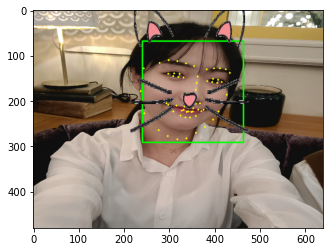

In [333]:
sticker_area = img_show[refined_y:img_sticker.shape[0], 
                        refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], 
         refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

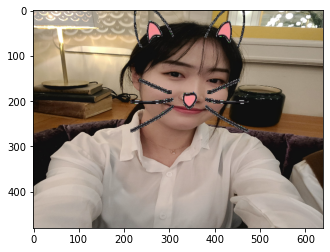

In [334]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], 
                       refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], 
        refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

고양이 수염과 귀가 함께 있는 스티커를 적용하다보니 스티커 크기와 위치를 잘 설정하는것이 매우 중요.
스티커 크기는 더 키워줬음